# Decision Tree for Bank Deposit 

In [2]:
# Our basic packages 

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [55]:
# ML packages 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# metrics packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus

## Importing our DATASET

In [4]:
df = pd.read_csv('./bank.csv')


In [5]:
# Viewing our data for the first time
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [6]:
#now lets drop the cols with unknown values
df.drop(['contact','poutcome'],axis = 1, inplace = True)

In [7]:
# Now lets see the dimesnions of our data
df.shape

(11162, 15)

In [8]:
# Now lets check for datatypes of the columns and any null values 
df.info()
feature_names = ['age','job','marital','education','default','balance','loan','day','month','duration','campaign','pdays',
                'previous','housing']
target_names = ['deposit']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [9]:
# Now lets look for mission values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [11]:
# Now lets start with the model building - first step data preprocessing #
# Now a function to preprocess and encode our categorical or object data
# package for this: from sklearn import preprocessing


def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    
    return res_df

In [12]:
# now lets preprocess our df by calling the function above
encoded_df = preprocessor(df)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,1,4
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,1,4
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,1,4
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,1,4
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,1,4


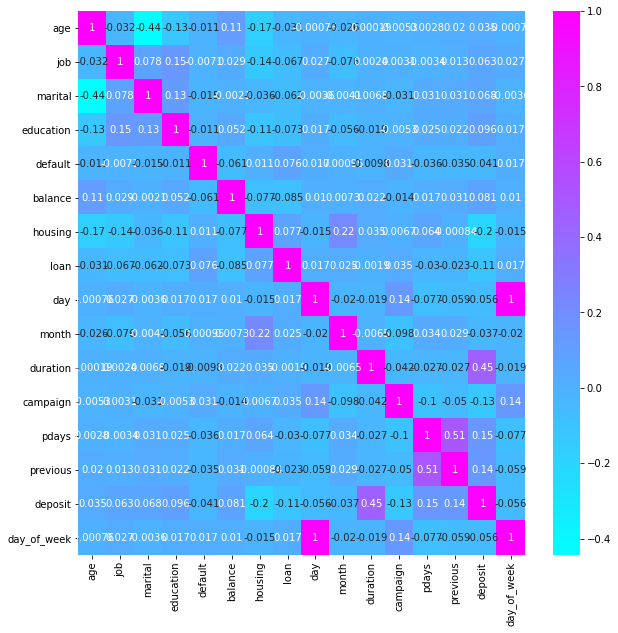

In [22]:
encoded_df.corr()
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(encoded_df.corr(), annot=True, cmap='cool')

In [23]:
# we need to assign the values for target and the rest to x and y 

x = encoded_df.drop(['deposit','day'],axis =1).values
y = encoded_df['deposit'].values

In [24]:
# Now lets split our data into train and test 
# using this package from sklearn.model_selection import train_test_split
# trin test actually store the x n y as numpy objects

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

# now our data is split into 80 for training and 20 for testing 
# lets try to see how our data looks like
x_train

array([[ 37,   4,   1, ...,  -1,   0,  12],
       [ 32,   9,   2, ...,  -1,   0,  17],
       [ 31,   4,   2, ...,  -1,   0,   1],
       ...,
       [ 28,   4,   2, ..., 232,   4,  28],
       [ 44,   3,   2, ...,  -1,   0,  19],
       [ 39,   9,   2, ...,  -1,   0,   6]], dtype=int64)

In [25]:
# Now that our data for modeling is ready lets split the data
# we are using this package for decision tree:from sklearn.tree import DecisionTreeClassifier
#our DT model will be called model_dt 

model_dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)

# lets fit our x and y train  into this model

model_dt2.fit(x_train, y_train)

# lets check the score of our training
model_dt2_train_score = model_dt2.score(x_train,y_train)
print('Training score', model_dt2_train_score)
# lets check score for testing data
model_dt2_test_score = model_dt2.score(x_test,y_test)
print('Testing score', model_dt2_test_score)

Training score 0.7112778586627841
Testing score 0.7048813255709807


In [58]:
model_dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 11,min_samples_leaf= 21)

# lets fit our x and y train  into this model

model_dt2.fit(x_train, y_train)

# lets check the score of our training
model_dt2_train_score = model_dt2.score(x_train,y_train)
print('Training score', model_dt2_train_score)
# lets check score for testing data
model_dt2_test_score = model_dt2.score(x_test,y_test)
print('Testing score', model_dt2_test_score)

Training score 0.8418635905476537
Testing score 0.8087774294670846


In [59]:

y_pred_dt = model_dt2.predict_proba(x_test)[:, 1]
y_pred_dt

array([0.        , 0.76923077, 1.        , ..., 0.02850877, 0.97435897,
       0.11111111])

## Performance Metrics 

In [60]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

predictions = model_dt2.predict(x_test)
predictions
y_actual_result = y_test[0]

for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

## Recall 

In [61]:
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8088512241054614


## Area Under Curve

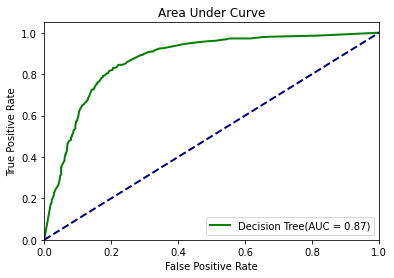

In [62]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [63]:
print (confusion_matrix(y_test, predictions))

[[947 202]
 [225 859]]


## Accuracy Score 

In [64]:
accuracy_score(y_test, predictions)

0.8087774294670846

- this accuracy score is not good enough 

In [43]:
# CHECKING FOR IMBALANCE DATA 
encoded_df['deposit'].sum()
# it's not target imabalance because we have 5.2k 1 cases and rest 6k 0 cases 

5289

## GridSearchCV 

In [56]:
# Let's use gridsearchCV to look for best parameters
import time 

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [6,7,8,9,10,11],
              'min_samples_leaf': [10,20,30],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf': [11,21,31]}

cv_rf = GridSearchCV(model_dt2, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 21}
Time taken in grid search:  7.48


- NOW LET'S PUT THESE PARAMETERS INTO OUR MODEL AND SEE HOW IT CHANGES: IT REMAINS THE SAME 
- WE HAVE TRIED TO INCREASE THE ACCURACY BY REMOVING CORRELATED VALUES, HYPERPARAMETER TUNING, CHECKING FOR IMBALANCE DATA